In [1]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
# select a pyplot style
plt.style.use('fivethirtyeight')
import seaborn as sns

# adjust pandas display
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 100)

In [2]:
# load the data
fbal = pd.read_csv('CompleteDataset.csv', index_col=0, low_memory=False)

fbal.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# determine the cols to keep
cols_2_keep = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Special', 
               'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure','Crossing', 
               'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 
               'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping','Long passing', 
               'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 
               'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision','Volleys', 
              'Preferred Positions']

fbal1 = fbal.copy()

fbal1 = fbal1[cols_2_keep]

In [4]:
# dimension
print(fbal1.shape, "\n")

# data info
fbal1.info()

(17981, 44) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17981 entries, 0 to 17980
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 17981 non-null  object
 1   Age                  17981 non-null  int64 
 2   Nationality          17981 non-null  object
 3   Overall              17981 non-null  int64 
 4   Potential            17981 non-null  int64 
 5   Club                 17733 non-null  object
 6   Value                17981 non-null  object
 7   Wage                 17981 non-null  object
 8   Special              17981 non-null  int64 
 9   Acceleration         17981 non-null  object
 10  Aggression           17981 non-null  object
 11  Agility              17981 non-null  object
 12  Balance              17981 non-null  object
 13  Ball control         17981 non-null  object
 14  Composure            17981 non-null  object
 15  Crossing             17981 non-null  ob

In [5]:
# determine if there are missing values.
missing = fbal1.isna().sum().sort_values(ascending=False)
percent_m = missing / len(fbal1)
dem = ('===' * 30)

print(f"\t\tNumber of missing values: \n{missing.head()} \n{dem} \n\t\tPercentage of missing values: \n{percent_m.head()}")

		Number of missing values: 
Club                   248
Preferred Positions      0
Agility                  0
Free kick accuracy       0
Finishing                0
dtype: int64 
		Percentage of missing values: 
Club                   0.013792
Preferred Positions    0.000000
Agility                0.000000
Free kick accuracy     0.000000
Finishing              0.000000
dtype: float64


#### The percentage of missing values in 'Club' is less than 2%

In [6]:
# det the unique values in each variable and the number of the unique values
for col in fbal1.columns:
    val = fbal1[col]
    print(f"{col}: \nUnique: {val.unique()} \nNumber of unique: {val.nunique()} \n{dem}")

Name: 
Unique: ['Cristiano Ronaldo' 'L. Messi' 'Neymar' ... 'A. Kelsey' 'B. Richardson'
 'L. Sackey'] 
Number of unique: 16975 
Age: 
Unique: [32 30 25 31 28 26 27 29 39 23 24 35 33 34 36 21 22 18 20 19 37 38 40 17
 44 41 16 43 47] 
Number of unique: 29 
Nationality: 
Unique: ['Portugal' 'Argentina' 'Brazil' 'Uruguay' 'Germany' 'Poland' 'Spain'
 'Belgium' 'Chile' 'Croatia' 'Wales' 'Italy' 'Slovenia' 'France' 'Gabon'
 'Sweden' 'Netherlands' 'Denmark' 'Slovakia' 'England' 'Colombia'
 'Austria' 'Greece' 'Czech Republic' 'Costa Rica' 'Armenia'
 'Bosnia Herzegovina' 'Ivory Coast' 'Senegal' 'Switzerland' 'Morocco'
 'Guinea' 'Egypt' 'Algeria' 'Cameroon' 'Serbia' 'Japan' 'Turkey' 'Ecuador'
 'Montenegro' 'Korea Republic' 'Kenya' 'Iceland' 'Mexico' 'Norway'
 'DR Congo' 'Ukraine' 'Russia' 'Finland' 'Republic of Ireland'
 'United States' 'Venezuela' 'Ghana' 'Uzbekistan' 'Nigeria' 'Canada'
 'Paraguay' 'Romania' 'Albania' 'Burkina Faso' 'Cape Verde' 'New Zealand'
 'Northern Ireland' 'Syria' 'Peru' '

**Comment:**
* The data contains a lot of abberant entries.
* The variables `Values` .... `Strength` all need to be cleaned.

### Data Wrangling

#### Tasks
* clean the columns i.e , 'Acceleration', 'Aggression', 'Agility', etc
* convert the variables to the right data types (e.g object to int/float)
* det the summary stats, visualize the distibutions of the numerical variables

In [7]:
# preview of the 'Value' variable
fbal1['Value'].head(10)

0    €95.5M
1     €105M
2     €123M
3      €97M
4      €61M
5      €92M
6    €64.5M
7    €90.5M
8      €79M
9      €77M
Name: Value, dtype: object

In [8]:
# det the length of the strings in 'Value'
desc_st = fbal1['Value'].str.len().describe()
val_uniq = fbal1['Value'].str.len().unique()

# det the length of the strings 'Wage'
wge_uniq = fbal1['Wage'].str.len().unique()

print(f"Descriptive Stats: \n{desc_st} \n\n{dem} \nUnique Values in 'Value': \n{val_uniq}")
print(f"Unique Values in 'Wage': \n{dem}\n{wge_uniq}")

Descriptive Stats: 
count    17981.000000
mean         4.761137
std          0.678818
min          2.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          6.000000
Name: Value, dtype: float64 

Unique Values in 'Value': 
[6 5 4 3 2]
Unique Values in 'Wage': 
[5 4 2 3]


<br />

* The descriptive stats show that the length of most strings is 5

In [9]:
### Helper Functions

def length_of_str_in_col(df, col, str_len):
    """A function that returns a dataframe containing the length of strings in the desired column."""
    my_filter = df[col].str.len() == str_len  # filter the 'Value'
    result = df.loc[my_filter, ['Name', col]]    # obtain a df containing the filtered result
    
    return result


def filter_col(df, col, my_str):
    '''A fuction that uses regex to filter strings. It returns a dataframe that matches the search.'''
    my_filter = df[col].str.lower().str.contains(f"{my_str}")  # filter the 'Value'
    result = df.loc[my_filter, ['Name', col]]    # obtain a df containing the filtered result
    
    return result


def split_variables(df):
    """Returns a list containing numerical and categorical variables"""
    num_cols = df.select_dtypes(include='number').columns.to_list()
    cat_cols = df.select_dtypes(exclude='number').columns.to_list()
    
    result = [num_cols, cat_cols]
    return result


def fballers_by_position(df, pos):
    """It returns a df containing the Name, Age, Overal and Potential of the players."""
    result = df.loc[df['Fav_position'] == pos, ['Name', 'Age', 'Overall', 'Potential']][:15]
    return result


from IPython.display import display_html
from itertools import chain,cycle

def display_side_by_side(*args,titles=cycle([''])):
    """It enables dataframes to be displayed side by side."""
    
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
        
    display_html(html_str,raw=True)
    
    

def general_position(posn):
    """It returns the position of a player."""
    if posn in ['CF', 'RW', 'LW', 'ST']:                   # Attacker
        return 'Att'                         
    
    elif posn in ['CDM', 'CM', 'RM', 'LM', 'CAM']:          # Midfielder
        return 'Mid'
    
    elif posn in ['CB', 'RB', 'LB', 'RWB', 'LWB']:         # Defender
        return 'Def'
    
    else:                                                  # Goalie
        return 'Gkp'

In [10]:
# display the possible patterns for 'Value'
a = filter_col(fbal1, 'Value', "[0-9€mk]")     

# display the possible patterns for 'Wage'
b = filter_col(fbal1, 'Wage', "[0-9€mk]")  

# display multiple data frames
display_side_by_side(a.sample(5) , b.sample(5), titles=["Possible patterns for 'Value'", "Possible patterns for 'Wage'"])

,Name,Value
9924,W. Moke,€425K
13434,C. Kennedy,€280K
10373,A. Al Shammari,€425K
8744,G. Hairemans,€950K
9502,U. Antuna,€1.2M
,Name,Wage
8279,K. Adams Nuhu,€11K
11605,J. Palacios,€1K
6055,A. Dantsev,€18K
2359,A. Naranjeda,€8K


In [11]:
# length of strings in 'Value' = 2 (shortest string)
v1 = length_of_str_in_col(fbal1, 'Value', 2)['Value'].head(2)

# length of strings in 'Value' = 6 (longest string)
v2 = length_of_str_in_col(fbal1, 'Value', 6)['Value'] .head(2)

print(f"shortest string: \n{v1}  \n\nlongest string: \n{v2}  \n{dem}")


# length of strings in 'Wage' = 2 (shortest string)
w1 = length_of_str_in_col(fbal1, 'Wage', 2)['Wage'].head(2)

# length of strings in 'Wage' = 5 (longest string)
w2 = length_of_str_in_col(fbal1, 'Wage', 5)['Wage'].head(2)

print(f"shortest string: \n{w1}  \n\nlongest string: \n{w2}")

shortest string: 
162    €0
167    €0
Name: Value, dtype: object  

longest string: 
0    €95.5M
6    €64.5M
Name: Value, dtype: object  
shortest string: 
162    €0
167    €0
Name: Wage, dtype: object  

longest string: 
0    €565K
1    €565K
Name: Wage, dtype: object


**Comment (Value):**
* if the length is greater than 2 then pattern is **€[0-9]K** or **€[0-9]M**
* if the length is 2, then the pattern is **€0**

**(Wage):**
* if the length is greater than 2 then pattern is **€[0-9]K**
* if the length is 2, then the pattern is **€0**

In [12]:
fbal2 = fbal1.copy()

# string manipulation
value = np.where(fbal2['Value'] == '€0',   # if this condition is met
         '€0K',                            # replace it with this value
         fbal2['Value'])                   # otherwise replace with the original value


wage = np.where(fbal2['Wage'] == '€0',     # if this condition is met
         '€0K',                            # replace it with this value
         fbal2['Wage'])                    # otherwise replace with the original value

fbal2['Value'] = value
fbal2['Wage'] = wage

In [13]:
# extract the currency
fbal2['Currency'] = fbal2['Value'].str.get(0)  # select the first string. i.e '€'

# extract the unit. i.e 'M' or 'K'
fbal2['Unit'] = fbal2['Value'].str.get(-1)

# extract the value
fbal2['Value (M)'] = fbal2['Value'].str[1:-1]

# extract the wage
fbal2['Wage (K)'] = fbal2['Wage'].str[1:-1]

In [14]:
fbal3 = fbal2.copy()

# convert to numeric
for col in ['Value (M)', 'Wage (K)']:
    fbal3[col] = pd.to_numeric(fbal3[col])

# convert the values with unit = 'K' to 'M'
fbal3['Value (M)'] = np.where(fbal3['Unit'] == 'K',              # if condition is True
                              (fbal3['Value (M)'] / 1_000),      # convert to millions
                              fbal3['Value (M)'])                # otherwise return the actual value

# drop irrelevant columns
fbal3 = fbal3.drop(columns=['Value', 'Wage'])

<br>

**Clean the other columns**

In [15]:
# filter rows that contain digits and '-' OR digits and '+' 
filter_col(fbal3, 'Acceleration', '[0-9].+[\+\-].+')['Acceleration'].head(3)

309    70+9
411    80+1
506    49-1
Name: Acceleration, dtype: object

In [16]:
cols_2_clean = ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure','Crossing', 
               'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 
               'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping','Long passing', 
               'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 
               'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision','Volleys']

# clean the columns
for col in cols_2_clean:
    fbal3[col] = np.where(fbal3[col].str.contains(r'[0-9].+[\+\-].+'),           # if condition is True
                              (fbal3[col].str[:2]),                              # extract the first 2 characters
                              fbal3[col])                                        # otherwise return the actual value
    

# verify the cleaning process
# for col in cols_2_clean:
#     val = fbal3[col]
#     print(f"{col}: \nUnique: {val.unique()} \nNumber of unique: {val.nunique()} \n{dem}")

In [17]:
## Convert the variables to the right data types (i.e object to int/float)

fbal4 = fbal3.copy()

# convert to numerical variables
for col in cols_2_clean:
    fbal4[col] = pd.to_numeric(fbal4[col])
    
# # verify
# fbal4.info()

In [18]:
cols = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Currency', 'Value (M)', 'Wage (K)', 'Special',
      'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure','Crossing', 
      'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 
      'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping','Long passing', 
      'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 
      'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision','Volleys', 'Preferred Positions']

# rearrange the columns
fbal4 = fbal4[cols]

# preview the data (randomly)
fbal4.sample(5, random_state=21)

,Name,Age,Nationality,Overall,Potential,Club,Currency,Value (M),Wage (K),Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
17816,S. Al Amrani,23,Saudi Arabia,50,59,Al Raed,€,0.04,2,1259,54,49,60,71,35,40,37,23,39,21,23,12,6,9,14,8,46,50,81,24,18,46,37,32,46,38,34,53,62,62,55,60,28,26,RB
4017,S. March,22,England,71,80,Brighton & Hove Albion,€,3.60,27,1755,79,49,80,79,71,68,67,70,79,66,64,9,11,7,13,15,35,30,42,62,71,35,55,63,59,67,74,39,78,70,37,61,64,54,CAM RM LM
4159,Juan Muñoz,21,Spain,71,76,UD Almería,€,3.20,10,1614,66,58,69,63,72,60,52,52,68,70,35,9,7,8,10,14,73,20,61,41,73,12,67,72,68,62,77,18,64,56,17,63,42,75,CAM ST
9314,D. Drocco,28,Argentina,66,66,Arsenal de Sarandí,€,0.65,4,1857,74,77,75,92,73,35,68,56,66,52,66,14,14,12,7,6,52,52,81,66,59,50,60,47,67,70,54,57,61,85,50,65,61,68,CDM CM
2868,Robson Denho,25,Brazil,73,73,Cruzeiro,€,3.50,24,1958,66,78,61,64,66,66,65,79,61,54,76,13,13,14,13,9,53,74,66,68,42,66,73,71,68,74,82,71,62,83,76,75,77,45,CM CDM


In [19]:
fbal5 = fbal4.copy()

# select the preferred position. The first element in the split is assumed to be the favourite position
fbal5['Fav_position'] = fbal4['Preferred Positions'].str.split().str[0]

# drop 'Preferred Positions'
fbal5 = fbal5.drop(columns=['Preferred Positions'])


# Descriptive Statistics
fbal5.describe()

,Age,Overall,Potential,Value (M),Wage (K),Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,17981.000000,17981.000000,17981.000000,17981.00000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,25.144541,66.247984,71.190813,2.38539,11.546966,1594.095100,64.600578,55.822257,63.342417,63.815528,58.109838,57.896057,49.781380,47.311996,55.067238,45.299538,43.179968,16.737779,16.513709,16.391914,16.501196,16.867249,52.343196,46.559924,64.900895,52.453812,47.218620,44.111117,48.988710,49.654191,61.904844,58.302931,55.661031,45.572048,64.832212,63.261109,47.446026,65.291363,53.022635,43.227852
std,4.614272,6.987965,6.102199,5.35397,23.080000,272.151435,14.907052,17.468440,14.791361,14.094377,16.799127,12.926942,18.459139,18.461347,18.991248,19.475738,17.577351,17.790776,17.013013,16.605478,17.128074,18.082975,17.410172,20.682663,11.884725,15.535665,19.282551,21.576320,15.812455,19.437103,9.171952,14.922538,17.398559,21.484684,14.637391,15.922908,21.834465,12.617383,14.387463,17.735041
min,16.000000,46.000000,46.000000,0.00000,0.000000,728.000000,11.000000,11.000000,14.000000,11.000000,8.000000,5.000000,5.000000,6.000000,2.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,13.000000,7.000000,3.000000,4.000000,5.000000,2.000000,28.000000,10.000000,3.000000,4.000000,11.000000,12.000000,4.000000,12.000000,10.000000,4.000000
25%,21.000000,62.000000,67.000000,0.30000,2.000000,1449.000000,56.000000,43.000000,55.000000,56.000000,53.000000,51.000000,38.000000,34.000000,48.000000,29.000000,31.000000,8.000000,8.000000,8.000000,8.000000,8.000000,45.000000,26.000000,58.000000,42.000000,32.000000,22.000000,39.000000,38.000000,55.000000,53.000000,46.000000,24.000000,57.000000,56.000000,26.000000,58.000000,43.000000,30.000000
50%,25.000000,66.000000,71.000000,0.67500,4.000000,1633.000000,67.000000,59.000000,65.000000,66.000000,63.000000,60.000000,54.000000,48.000000,61.000000,48.000000,42.000000,11.000000,11.000000,11.000000,11.000000,11.000000,56.000000,52.000000,66.000000,56.000000,51.000000,48.000000,50.000000,55.000000,62.000000,62.000000,59.000000,52.000000,67.000000,66.000000,54.000000,66.000000,55.000000,44.000000
75%,28.000000,71.000000,75.000000,2.10000,12.000000,1786.000000,75.000000,69.000000,74.000000,74.000000,69.000000,67.000000,64.000000,62.000000,68.000000,61.000000,57.000000,14.000000,14.000000,14.000000,14.000000,14.000000,64.000000,64.000000,73.000000,64.000000,63.000000,63.000000,61.000000,64.000000,68.000000,68.000000,69.000000,64.000000,75.000000,74.000000,66.000000,74.000000,64.000000,57.000000
max,47.000000,94.000000,94.000000,123.00000,565.000000,2291.000000,96.000000,96.000000,96.000000,96.000000,95.000000,96.000000,91.000000,92.000000,97.000000,95.000000,93.000000,91.000000,91.000000,95.000000,91.000000,90.000000,94.000000,92.000000,95.000000,93.000000,92.000000,92.000000,92.000000,95.000000,96.000000,92.000000,94.000000,91.000000,96.000000,95.000000,92.000000,98.000000,94.000000,91.000000


<br>

**Observations:**
* `Age`: Since the mean is slighly greater than the median, the distribution of the Age slightly positively skewed.
* `Overall`: The mean is slighly greater than the median it implies that the distribution of the Overall slightly positively skewed.
* `Potential`: The mean is slighly greater than the median it implies that the distribution of the Potential slightly positively skewed.
* `Value (M)`: It's positively skewed since mean >> median and it has outliers.
* `Wage (K)`: It's positively skewed since mean >> median and it has outliers.
* `Special`: Mean > Median. It's negatively skewed.

In [20]:
# split the data into numerical and categorical variables
num_cols, cat_cols = split_variables(fbal5)

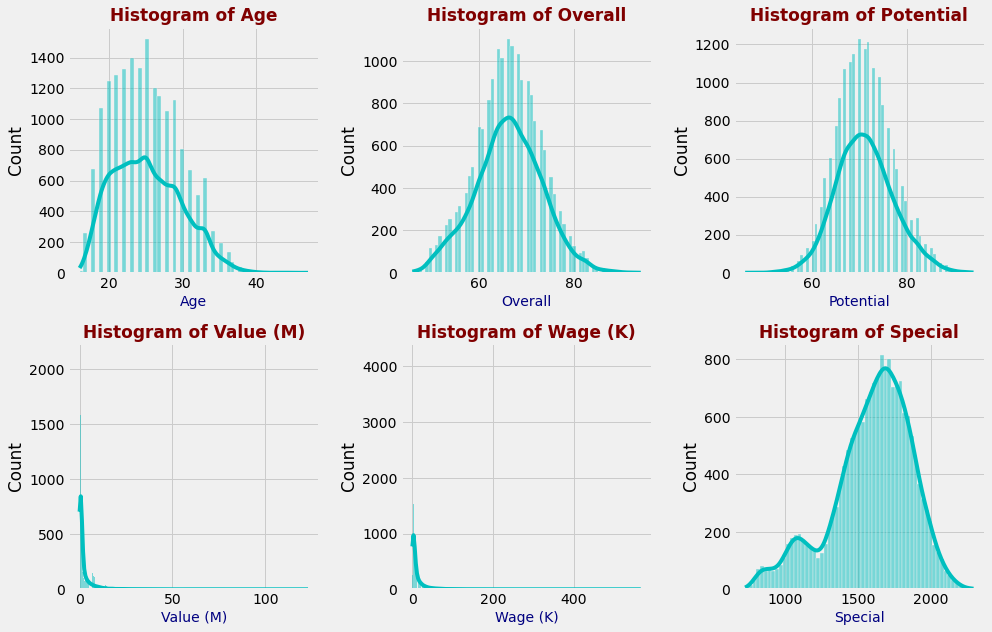

In [21]:
# histogram

nrows, ncols = 2, 3
fig, axs = plt.subplots(nrows, ncols, figsize=(nrows*7, ncols*3))
color = 'c'
color_x, color_t = 'navy', 'maroon'

for (idx, col) in enumerate(['Age', 'Overall', 'Potential', 'Value (M)', 'Wage (K)', 'Special']):
    ax = axs[(idx // ncols), (idx % ncols)]   # axis
    sns.histplot(data=fbal5, x=col, ax=ax, kde=True, color=color)                                      # plot histogram
    ax.set_xlabel(f"{col}", fontsize=14, color=color_x)                                                # x axis
    ax.set_title(f"Histogram of {col}", fontsize=17, color=color_t, fontweight='heavy')                # title
    
fig.tight_layout()
plt.show()

**Comment:**
* As expected, the distributions of 'Value (M)' and 'Wage (K)' are heavily right skewed with lots of outliers.
* The other variables follow a normal distribution.

In [22]:
# Determine the clubs with the most top players
cut_off = np.percentile(fbal5['Overall'], 98)   # 98th percentile

# top 2% of the players
top_players_df = fbal5.loc[fbal5['Overall'] > cut_off, 
                           ['Name', 'Age', 'Nationality', 'Club', 'Overall', 'Potential', 'Value (M)','Wage (K)', 'Special', 'Fav_position']]
  
# Top 10 represented clubs
top_rep_clubs = pd.crosstab(index=top_players_df['Club'], columns='No_of_Players').sort_values('No_of_Players', ascending=False).head(15)
top_rep_clubs = top_rep_clubs.sort_index()
top_rep_clubs.columns = ['No_of_Players']


top_rep_clubs_df= fbal5.loc[fbal5['Club'].isin(top_rep_clubs.index), 
                       ['Name', 'Age', 'Nationality', 'Club', 'Overall', 'Potential', 'Value (M)','Wage (K)', 'Special', 'Fav_position']]

# Top 10 represented countries
top_rep_ctry = pd.crosstab(index=fbal5['Nationality'], columns='Count').sort_values(by='Count', ascending=False).head(15)
top_rep_ctry.columns = ['No_of_Players']

# Frequency table of 'Fav_position'
fav_posn = pd.crosstab(index=fbal5['Fav_position'], columns='Count').sort_values(by='Count', ascending=False)
fav_posn.columns = ['No_of_Players']

# display multiple data frames
display_side_by_side(top_players_df.head() ,top_rep_clubs.head(), top_rep_ctry.head(), fav_posn.head(),
                     titles=['TopPlayers', 'TopClubs', 'TopRepdCountries', 'FavPosition'])


TopPlayers 
 
 
 
 Name 
 Age 
 Nationality 
 Club 
 Overall 
 Potential 
 Value (M) 
 Wage (K) 
 Special 
 Fav_position 
 
 
 
 
 0 
 Cristiano Ronaldo 
 32 
 Portugal 
 Real Madrid CF 
 94 
 94 
 95.5 
 565 
 2228 
 ST 
 
 
 1 
 L. Messi 
 30 
 Argentina 
 FC Barcelona 
 93 
 93 
 105.0 
 565 
 2154 
 RW 
 
 
 2 
 Neymar 
 25 
 Brazil 
 Paris Saint-Germain 
 92 
 94 
 123.0 
 280 
 2100 
 LW 
 
 
 3 
 L. Suárez 
 30 
 Uruguay 
 FC Barcelona 
 92 
 92 
 97.0 
 510 
 2291 
 ST 
 
 
 4 
 M. Neuer 
 31 
 Germany 
 FC Bayern Munich 
 92 
 92 
 61.0 
 230 
 1493 
 GK 
 
 
 TopClubs 
 
 
 
 No_of_Players 
 
 
 Club 
 
 
 
 
 
 Arsenal 
 10 
 
 
 Atlético Madrid 
 12 
 
 
 Borussia Dortmund 
 8 
 
 
 Chelsea 
 13 
 
 
 FC Barcelona 
 14 
 
 
 TopRepdCountries 
 
 
 
 No_of_Players 
 
 
 Nationality 
 
 
 
 
 
 England 
 1630 
 
 
 Germany 
 1140 
 
 
 Spain 
 1019 
 
 
 France 
 978 
 
 
 Argentina 
 965 
 
 
 FavPosition 
 
 
 
 No_of_Players 
 
 
 Fav_position 
 
 
 
 
 
 CB 
 2705 
 
 
 ST 
 2277 
 
 
 GK 
 2029 
 
 
 CM 
 1977 
 
 
 CDM 
 1396

**Comment:**
* **Juventus** and **Real Madrid** are the top two clubs with the best players in the game.
* The top 15 clubs are dominated by **English clubs** with 6 out of a total of 15.
* **Spanish** and **Italian clubs** tie with 3 clubs each making the top 15 clubs in the game.
* The top 3 player positions in the game in terms of frequency are: **'CB'**,**'ST'** and **'GK'**.

In [23]:
top_wage = (
    top_rep_clubs_df.groupby('Club')[['Wage (K)']]
        .agg('sum'))

top_wage.head()

,Wage (K)
Club,
Arsenal,3007
Atlético Madrid,1581
Borussia Dortmund,1705
Chelsea,3537
FC Barcelona,4792


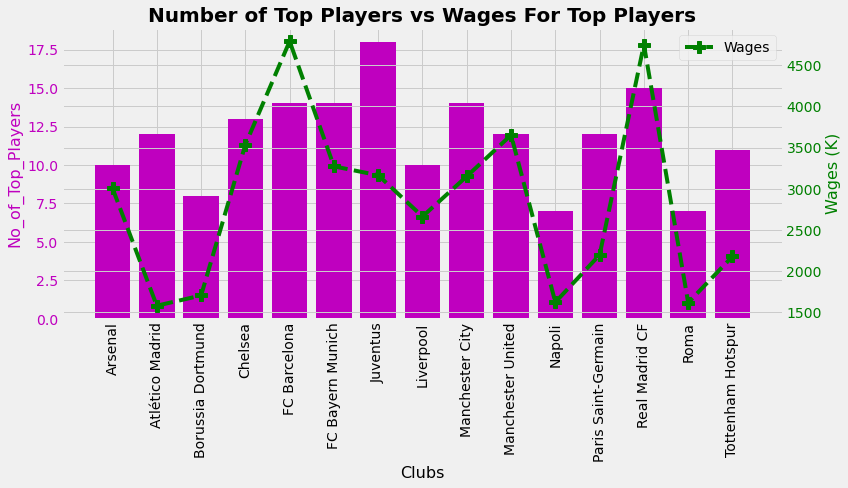

In [24]:
x_val, y1_val, y2_val = range(15),  top_rep_clubs['No_of_Players'], top_wage['Wage (K)']

fig, ax1 = plt.subplots(figsize=(12, 7))


ax1.bar(x_val, y1_val, color='m', label='No_of_Top_Players')
plt.xticks(ticks=x_val, labels=top_rep_clubs.index, rotation='vertical')
ax1.set_xlabel('Clubs', fontsize=16)
ax1.set_ylabel('No_of_Top_Players', fontsize=16, color='m')
ax1.tick_params(axis='y', labelcolor= 'm')


# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx() 
ax2.plot(x_val, y2_val, marker='P', color='green', linestyle='dashed', linewidth=4, markersize=12, label='Wages')
ax2.set_ylabel('Wages (K)', fontsize=16, color='green')
ax2.tick_params(axis='y', labelcolor= 'green')


plt.title('Number of Top Players vs Wages For Top Players', fontsize=20, fontweight='heavy')

plt.legend(loc=0)
plt.tight_layout()
plt.show()

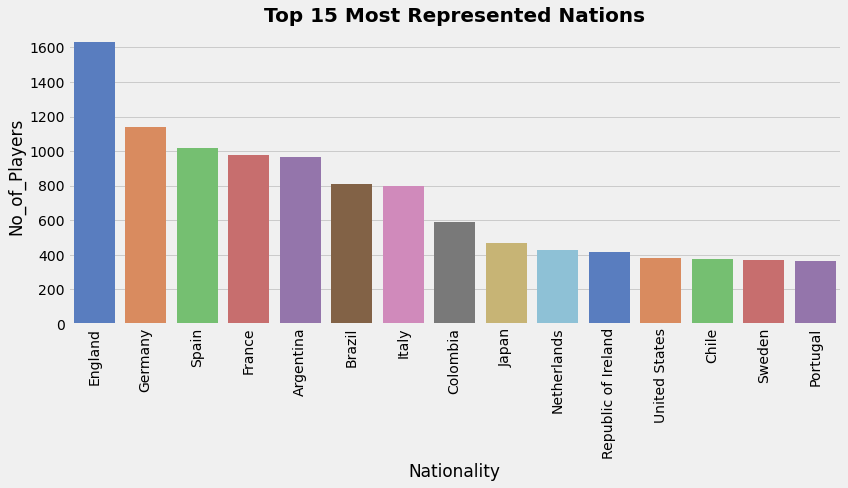

In [25]:
# Plot
x_val, y1_val = top_rep_ctry.index, top_rep_ctry['No_of_Players'] 
plt.figure(figsize=(12, 7))
sns.barplot(x=x_val, y=y1_val, palette='muted')
plt.xticks(ticks=range(15), labels=x_val, rotation=90)
plt.xlabel('Nationality', fontsize=17)
plt.title('Top 15 Most Represented Nations', fontsize=20, fontweight='heavy')

plt.tight_layout()
plt.show()

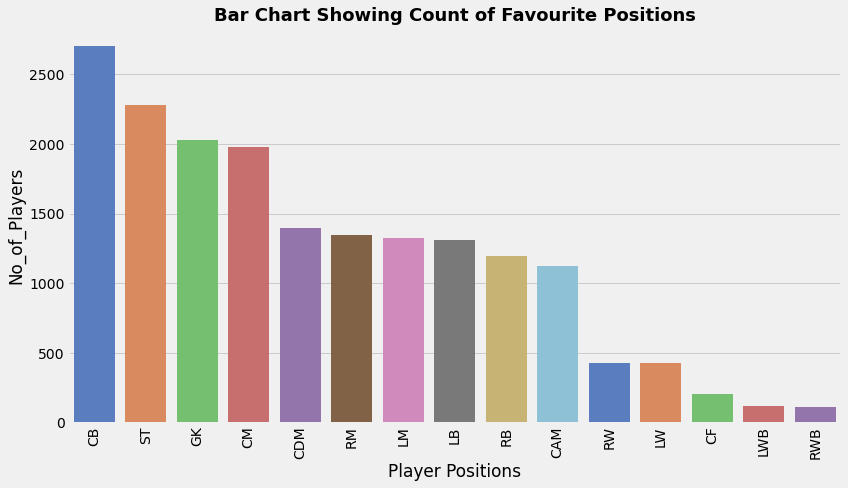

In [26]:
# Plot
x_val, y1_val = fav_posn.index, fav_posn['No_of_Players']  
plt.figure(figsize=(12, 7))
sns.barplot(x=x_val, y=y1_val, palette='muted')
plt.xticks(ticks=range(15), labels=x_val, rotation=90)
plt.xlabel('Player Positions', fontsize=17)
plt.title('Bar Chart Showing Count of Favourite Positions', fontsize=18, fontweight='heavy')

plt.tight_layout()
plt.show()

<br>

#### Top Players By Position

In [27]:
# CAM
a = fballers_by_position(fbal5,'CAM')

# CB
b = fballers_by_position(fbal5,'CB')

# CDM
c = fballers_by_position(fbal5,'CDM')


display_side_by_side(a.head(), b.head(), c.head(), titles=['Top_CAM', "Top_CB", "Top_CDM"])

,Name,Age,Overall,Potential
54,Coutinho,25,86,89
59,R. Nainggolan,29,86,86
65,Cesc Fàbregas,30,86,86
112,I. Perišić,28,84,84
114,Willian,28,84,84
,Name,Age,Overall,Potential
10,Sergio Ramos,31,90,90
17,G. Chiellini,32,89,89
24,L. Bonucci,30,88,88
25,J. Boateng,28,88,88


In [28]:
# CF
a = fballers_by_position(fbal5,'CF')

# CM
b = fballers_by_position(fbal5,'CM')

# GK
c = fballers_by_position(fbal5,'GK')


display_side_by_side(a.head(), b.head(), c.head(), titles=['Top_CF', "Top_CM", "Top_GK"])

,Name,Age,Overall,Potential
158,S. Kagawa,28,83,83
177,Jonas,33,83,83
184,Borja Valero,32,83,83
217,F. Vázquez,28,82,82
362,D. Perotti,28,81,81
,Name,Age,Overall,Potential
33,N. Kanté,26,87,90
37,A. Vidal,30,87,87
40,M. Hamšík,29,87,87
41,I. Rakitić,29,87,87


In [29]:
# LM
a = fballers_by_position(fbal5,'LM')

# LW
b = fballers_by_position(fbal5,'LW')

# LWB
c = fballers_by_position(fbal5,'LWB')


display_side_by_side(a.head(), b.head(), c.head(), titles=['Top_LM', "Top_LW", "Top_LWB"])

,Name,Age,Overall,Potential
36,C. Eriksen,25,87,91
42,David Silva,31,87,87
45,Iniesta,33,87,87
48,Isco,25,86,90
51,Alex Sandro,26,86,88
,Name,Age,Overall,Potential
2,Neymar,25,92,94
7,E. Hazard,26,90,91
21,A. Griezmann,26,88,91
55,M. Reus,28,86,86


In [30]:
# RB
a = fballers_by_position(fbal5,'RB')

# RM
a = fballers_by_position(fbal5,'RM')

# RW
a = fballers_by_position(fbal5,'RW')


display_side_by_side(a.head(), b.head(), c.head(), titles=['Top_RB', "Top_RM", "Top_RW"])

,Name,Age,Overall,Potential
1,L. Messi,30,93,93
15,G. Bale,27,89,89
28,M. Özil,28,88,88
32,A. Robben,33,88,88
137,M. Salah,25,83,86
,Name,Age,Overall,Potential
2,Neymar,25,92,94
7,E. Hazard,26,90,91
21,A. Griezmann,26,88,91
55,M. Reus,28,86,86


In [31]:
# RWB
a = fballers_by_position(fbal5,'RWB')

# ST
a = fballers_by_position(fbal5,'ST')




display_side_by_side(a.head(), b.head(), titles=['Top_RWB', "Top_ST"])

,Name,Age,Overall,Potential
0,Cristiano Ronaldo,32,94,94
3,L. Suárez,30,92,92
5,R. Lewandowski,28,91,91
9,G. Higuaín,29,90,90
16,S. Agüero,29,89,89
,Name,Age,Overall,Potential
2,Neymar,25,92,94
7,E. Hazard,26,90,91
21,A. Griezmann,26,88,91
55,M. Reus,28,86,86


<br>


In [32]:
# Add a new variable (General player position)
top_rep_clubs_df['Position'] = top_rep_clubs_df['Fav_position'].apply(general_position)

In [33]:
a = (
    pd.crosstab(index=top_rep_clubs_df['Club'], 
                columns=top_rep_clubs_df['Position'], 
                values=top_rep_clubs_df['Wage (K)'], aggfunc=np.sum, margins=True)
    )

display_side_by_side(a, titles=['Wages of Players Grouped by Player Position'])

# top_rep_clubs_df.loc[(top_rep_clubs_df['Club'] == 'Manchester City'), :]

Position,Att,Def,Gkp,Mid,All
Club,,,,,
Arsenal,868,811,183,1145,3007
Atlético Madrid,423,523,142,493,1581
Borussia Dortmund,503,366,99,737,1705
Chelsea,1020,832,344,1341,3537
FC Barcelona,1700,960,327,1805,4792
FC Bayern Munich,957,594,304,1418,3273
Juventus,579,686,234,1666,3165
Liverpool,677,676,242,1069,2664
Manchester City,544,999,202,1407,3152


**Comment:**
* Surprisingly, 'midfielders' earn the most in the game.
* It may be as a result of the fact that the first position in the `Preferred Positions` was chosen earlier.

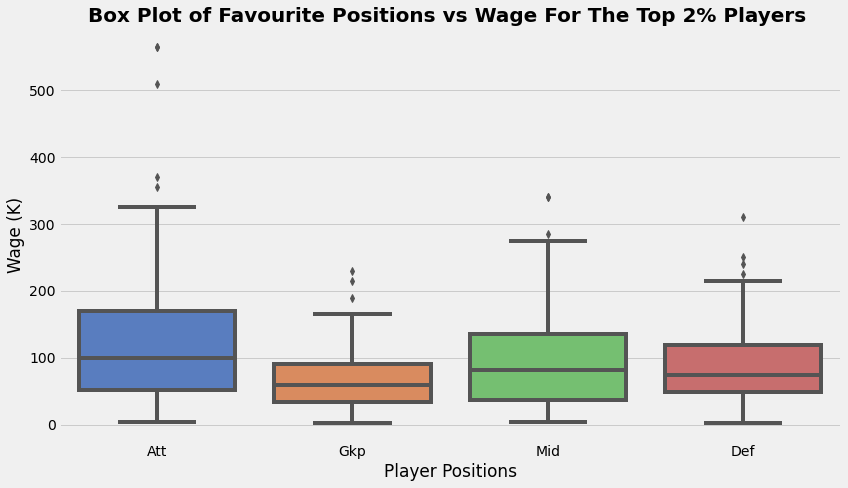

In [34]:
# Plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='Position', y='Wage (K)', data=top_rep_clubs_df, palette='muted')

plt.xlabel('Player Positions', fontsize=17)
plt.title('Box Plot of Favourite Positions vs Wage For The Top 2% Players ', fontsize=20, fontweight='heavy')

plt.tight_layout()
plt.show()

**Comment:**
* For the top players (top 2% players), **'attackers'** earn more than players in other positions.

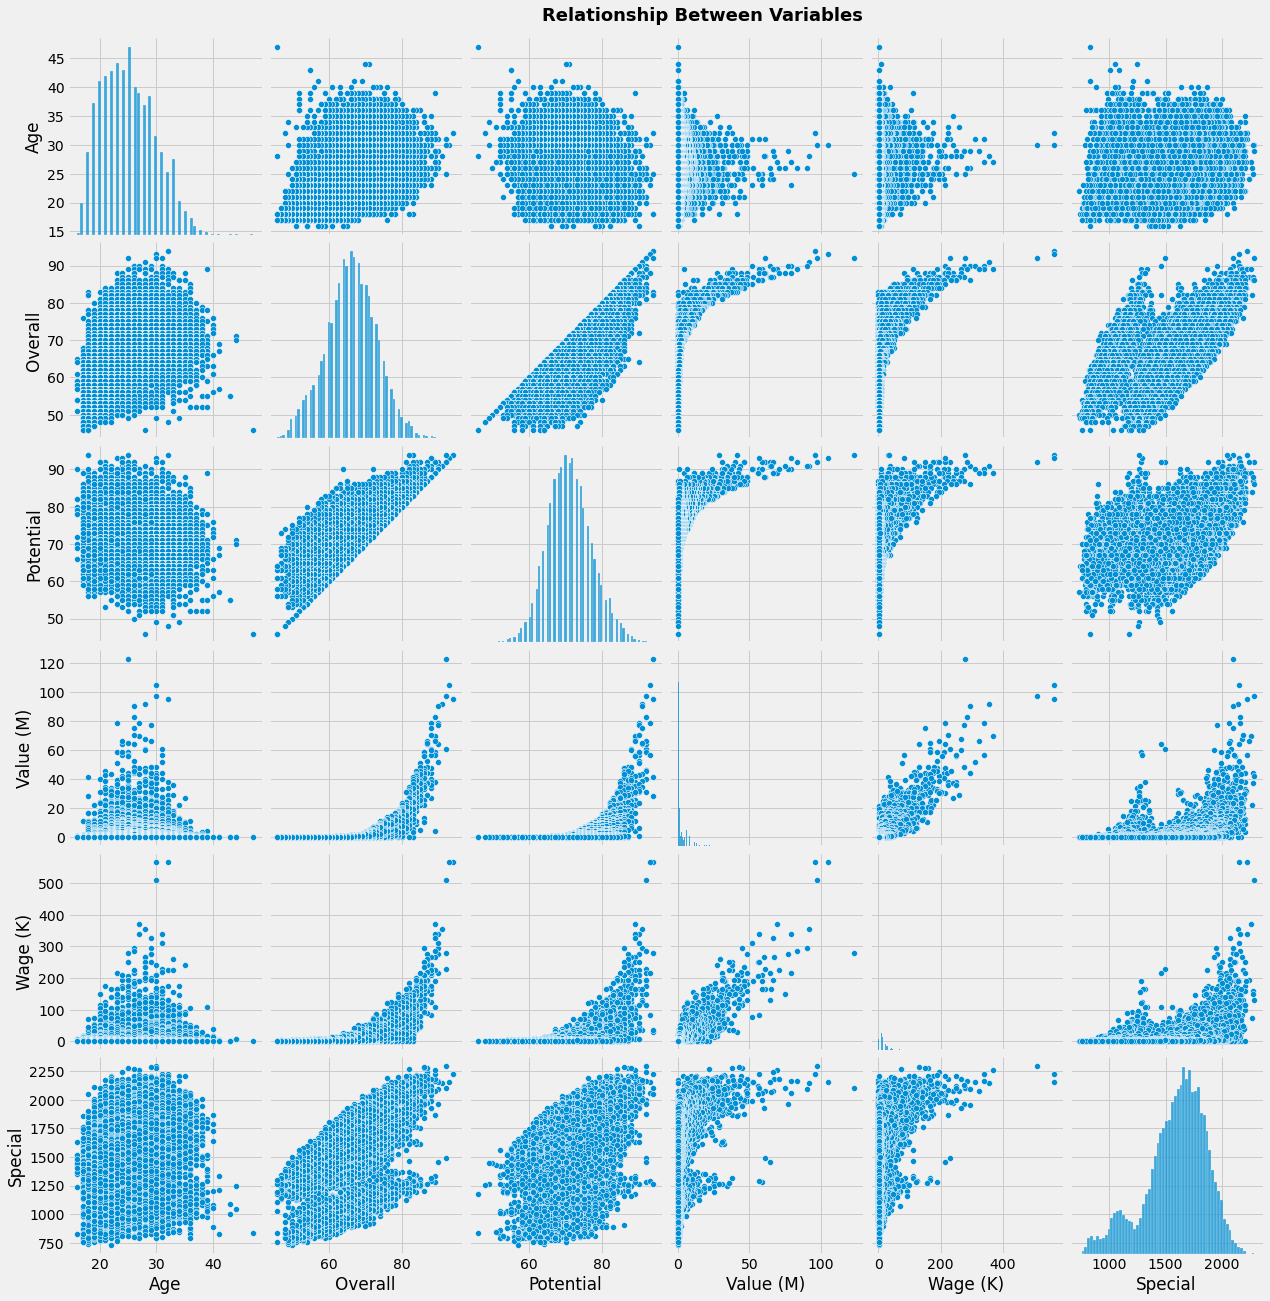

In [35]:
# Pair plot of nu,erical variables
data = fbal5[['Name', 'Age', 'Nationality', 'Club', 'Overall', 'Potential', 'Value (M)','Wage (K)', 'Special', 'Fav_position']]

sns.pairplot(data=data, height=3)
plt.title('Relationship Between Variables', fontsize=18, fontweight='heavy', y=5.2, x=-1.9)

plt.show()

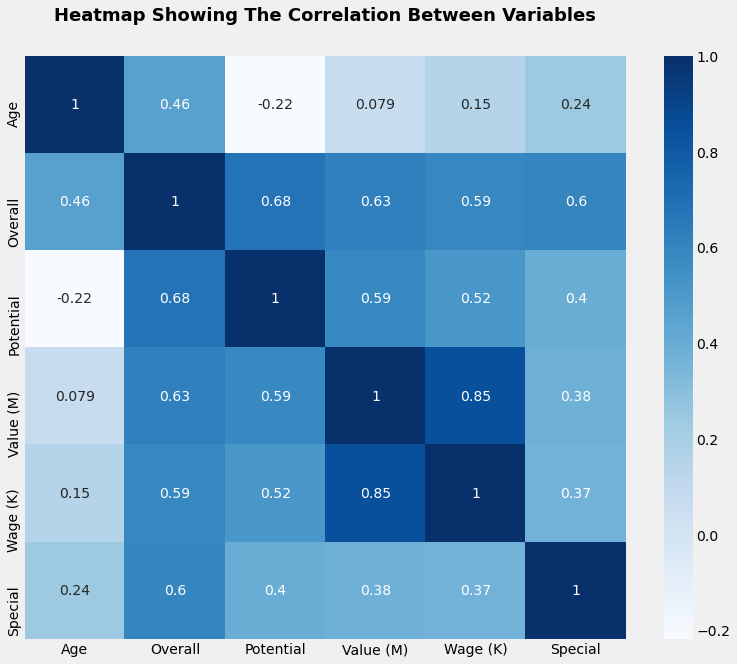

In [36]:
# heatmap
plt.figure(figsize=(12, 10))

sns.heatmap(data=data.corr(), annot=True, cmap='Blues')
plt.title('Heatmap Showing The Correlation Between Variables', fontsize=18, fontweight='heavy', y=1.05)

plt.show()

**Comment:**
* `Wage (K)` and `Value (M)` are strongly positively correlated.
* `Potential` and `Overall`, `Overall` and `Value (M)`, `Special` and `Overall` are positively correlated.
* `Age` and `Potential` are nagatively correlated.
